In [66]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import time
import random
import pandas as pd

from scipy import signal
from scipy import misc
from scipy.spatial import distance
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

from ipywidgets import Image
from ipycanvas import Canvas

In [67]:
def random_color():
    levels = range(32,256,32)
    return tuple(random.choice(levels) for _ in range(3))

In [68]:
img = []
img4 = []
img_orig = []

### Load image

##### Insert white border around image

In [90]:
img = cv2.imread("map.png", cv2.IMREAD_GRAYSCALE);
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB);
img = backtorgb.dot([0.33,0.33,0.33])

(my,mx)=img.shape
img[0,:]=255
img[:,0]=255
img[my-1,:]=255
img[:,mx-1]=255

img_orig = img.copy()

image_data = np.stack((backtorgb[:,:,0],backtorgb[:,:,1],backtorgb[:,:,2]), axis=2)

### Process Image to find middle point between tracks

##### Difference between subsequent dilations

In [91]:
difftmp = np.array([[1,1,1],[1,0,1],[1,1,1]])
kernel = np.ones((3,3),np.uint8)
img4 = np.zeros_like(img)*0
clas = True
while clas == True:
    img2 = cv2.dilate(img,kernel,iterations = 1)
    img3 = img2-img
    if np.sum(img3)==0:
        break
    
    ### Calculate number of white pixels around this pixel
    img4 = img4+(signal.convolve2d(img3,difftmp, boundary='symm', mode='same')/255>4)*255
    
    image_data = np.stack((img3+img4,img3+img_orig,img3), axis=2)
    img = img2.copy()
image_data = np.stack((img4,img4+img3,img4), axis=2)

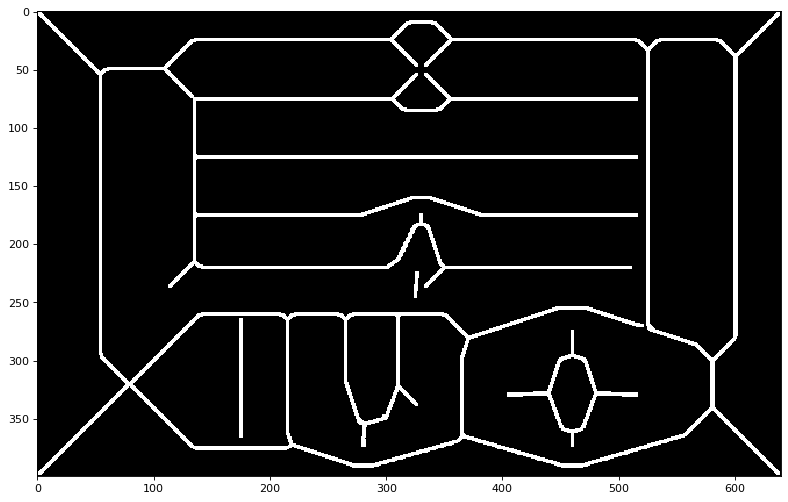

In [92]:
dst = image_data.copy()

kernel = np.ones((3,3),np.uint8)
img4 = cv2.dilate(img4,kernel,iterations = 1)
#img5 = cv2.morphologyEx(img5, cv2.MORPH_CLOSE, kernel)
#img4 = cv2.erode(img5,kernel,iterations = 1)


figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.show()

In [93]:
from skimage import color
gimg = color.colorconv.rgb2grey(img4)

In [94]:
from skimage import measure
contours = measure.find_contours(gimg, 0.2)

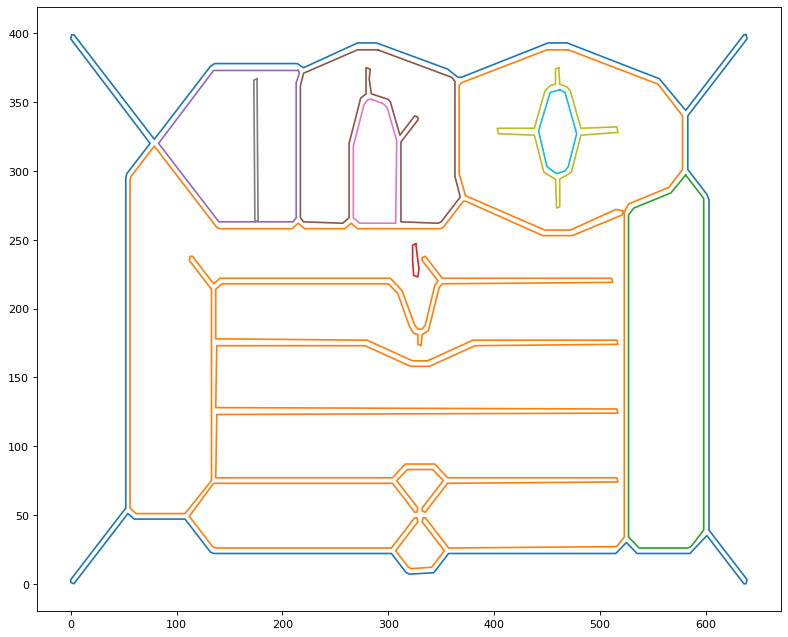

In [111]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
all_lines=[]
for i in range(len(contours)):
    contour = contours[i]
    new_s = contour.copy()
    appr_s = approximate_polygon(new_s, tolerance=1.2)
    
    plt.plot(appr_s[:, 1], appr_s[:, 0])
    
    for i in range(len(appr_s)):
        all_lines.append((appr_s[i,1],appr_s[i,0]))

### Summarize small bits to lines
Go through all contours

In [16]:
#### Remove lines that touch Tracks

for i in range(len(contour_map)):
    
    #cv2.drawContours(backtorgb, contours, i, random_color(), 3)
    first = True
    colourr = random_color()
    for a in contour_map[i]:
        (x,y)=a
        colourr = random_color()
        
        #print([x,y],sum(sum(img_orig[y-3:y+3,x-3:x+3])))
        minx=max(0,x-3)
        miny=max(0,y-3)
        maxx=min(mx,x+3)
        maxy=min(my,y+3)
        if sum(sum(img_orig[miny:maxy,minx:maxx]))<20:
            if first==True:
                first=False
                x1=x
                y1=y
            else:
                cv2.line(backtorgb,(x,y),(x1,y1),colourr,1)
                x1=x
                y1=y
            
                
        image_data = np.stack((backtorgb[:,:,0],backtorgb[:,:,1],backtorgb[:,:,2]), axis=2)
        canvas2.put_image_data(image_data,0,0)
        canvas2
        
    
    